In [3]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
df = pd.read_csv("Tesla.csv")

In [5]:
df.head(6)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
5,7/7/2010,16.400000,16.629999,14.980000,15.800000,6921700,15.800000


In [6]:
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

Text(0.5, 1.0, 'Tesla')

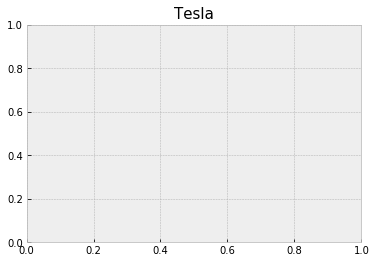

In [7]:
plt.title('Tesla',size=15)

Text(0, 0.5, 'Open Price')

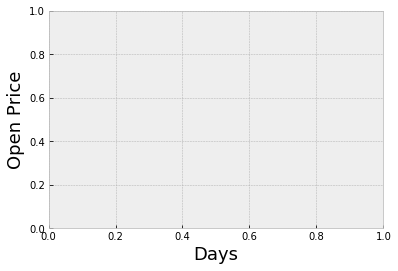

In [8]:
plt.xlabel('Days',fontsize =18)
plt.ylabel('Open Price',fontsize = 18)

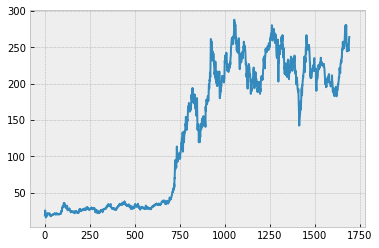

In [9]:
plt.plot(df['Open'])

In [10]:
df = df[['Close']]
df.head(4)

,Close
0,23.889999
1,23.830000
2,21.959999
3,19.200001


In [27]:
predict_days = 20
df['prediction'] = df[['Close']].shift(-predict_days)
df.tail(4)

,Close,prediction
1688,258.000000,NaN
1689,255.729996,NaN
1690,262.049988,NaN
1691,261.500000,NaN


In [28]:
X = np.array(df.drop(['prediction'],1))[:-predict_days]
print(X)

[[ 23.889999]
 [ 23.83    ]
 [ 21.959999]
 ...
 [280.980011]
 [279.76001 ]
 [268.950012]]


In [29]:
y = np.array(df['prediction'])[:-predict_days]
print(y)

[ 20.719999  20.35      19.940001 ... 255.729996 262.049988 261.5     ]


In [30]:
x_train, x_text, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [31]:
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)

In [32]:
x_future = df.drop(['prediction'],1)[:-predict_days]
x_future = x_future.tail(predict_days)
x_future = np.array(x_future)
x_future

array([[244.729996],
       [248.919998],
       [254.610001],
       [254.470001],
       [252.509995],
       [252.949997],
       [250.630005],
       [251.929993],
       [249.240005],
       [251.550003],
       [251.330002],
       [257.769989],
       [257.480011],
       [262.079987],
       [269.200012],
       [269.230011],
       [280.600006],
       [280.980011],
       [279.76001 ],
       [268.950012]])

In [33]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[272.230011 277.390015 273.51001  255.990005 257.       246.229996
 249.990005 250.020004 250.479996 251.570007 219.580002 248.589996
 246.869995 221.309998 243.690002 246.169998 258.       259.279999
 262.049988 261.5     ]



In [34]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)
print()

[245.28762475 249.39422534 254.97096962 254.8337563  252.91276395
 253.34400777 251.07019489 252.34430681 249.70786265 251.97188046
 251.75625855 258.0680585  257.78385247 262.29226658 269.27056847
 269.29997035 280.44364717 280.81608823 279.62037118 269.02554469]



/Users/akhiltadimeti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


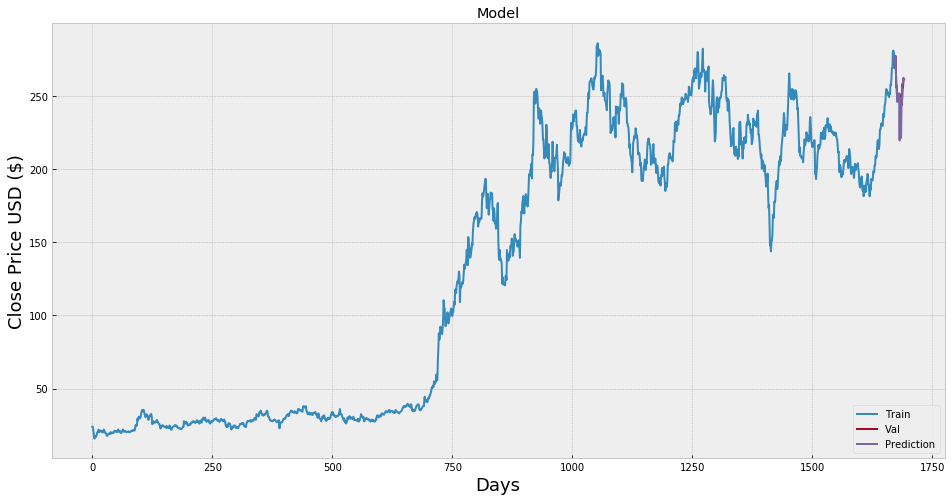

In [35]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()


/Users/akhiltadimeti/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


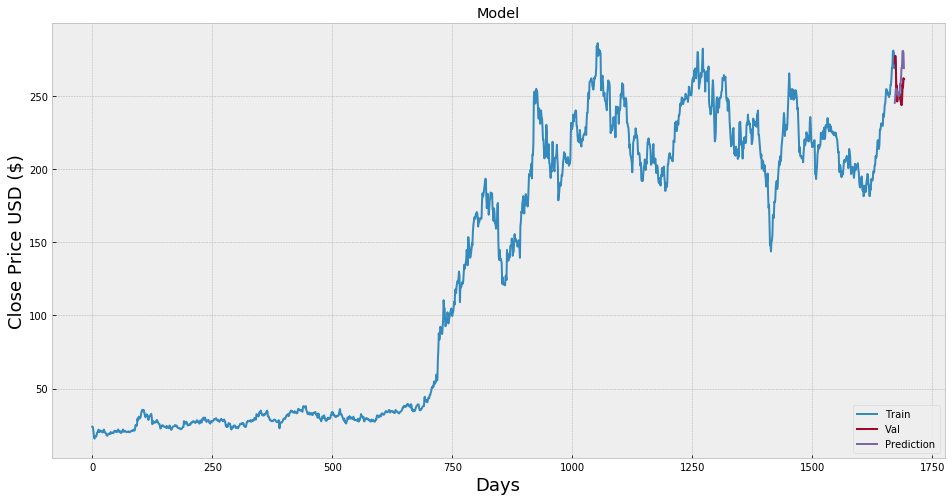

In [37]:
 #Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()